In [101]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [102]:
data=pd.read_csv('abalone.csv')
data

,Sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [103]:
data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [104]:
data.isnull().sum()

Sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
age               0
dtype: int64

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

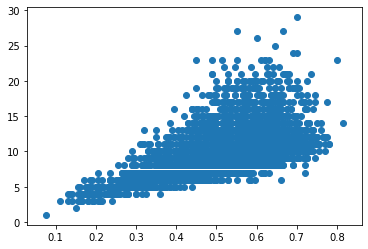

In [107]:
#Bivariate analysis 
plt.scatter(data['length'],data['age'])

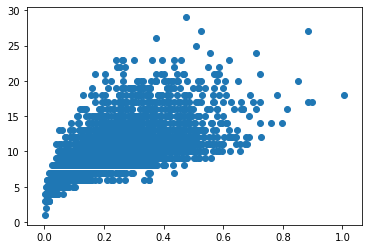

In [108]:
plt.scatter(data['shell weight'],data['age'])

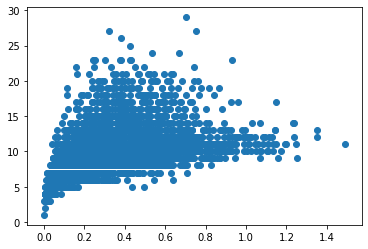

In [109]:
plt.scatter(data['shucked weight'],data['age'])

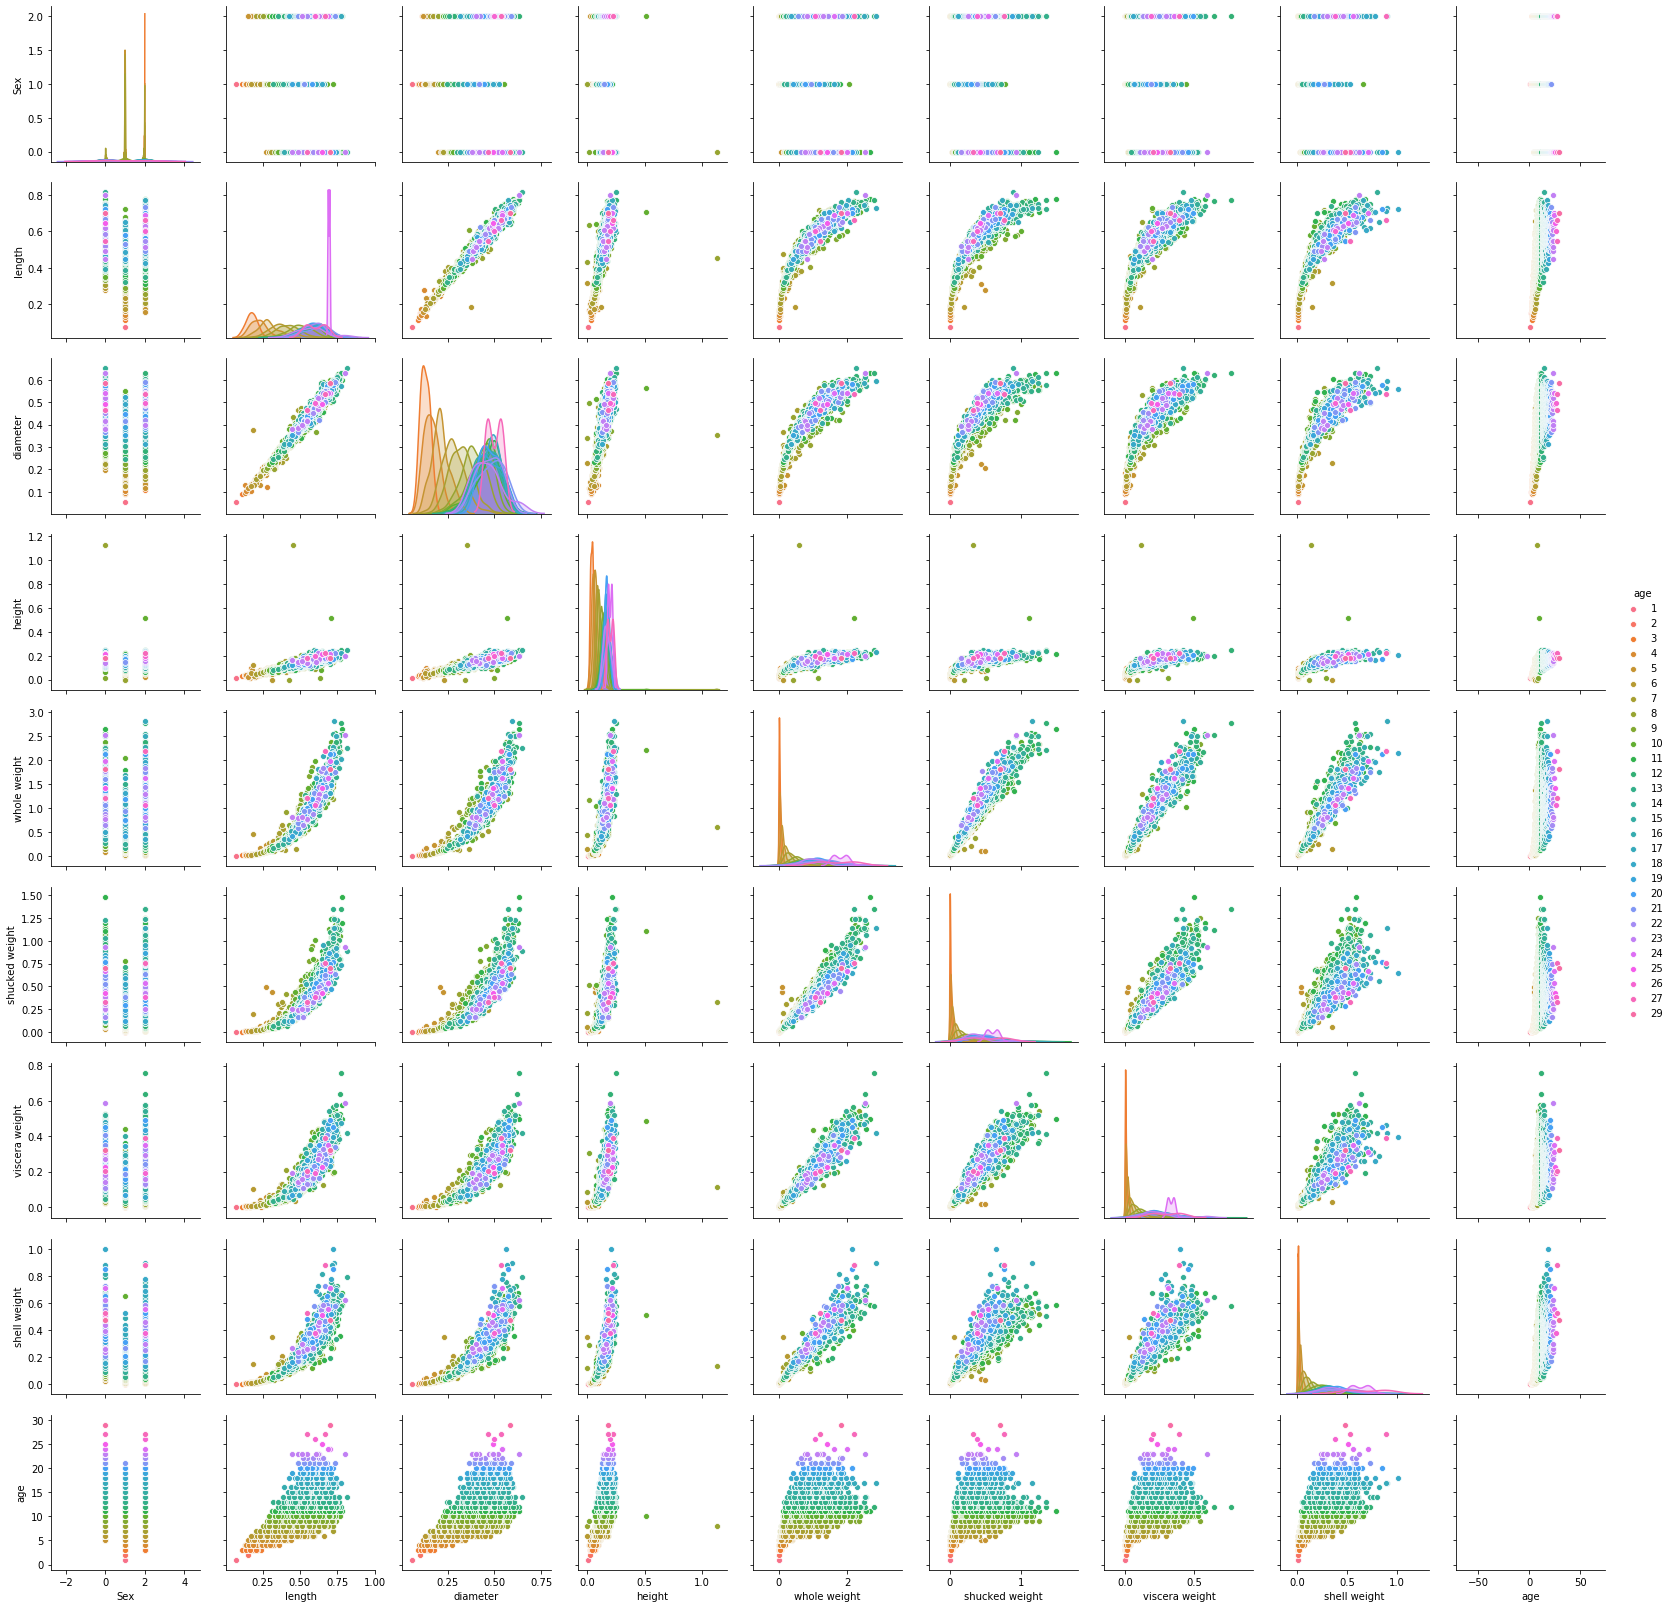

In [110]:
sns.pairplot(data,hue='age');

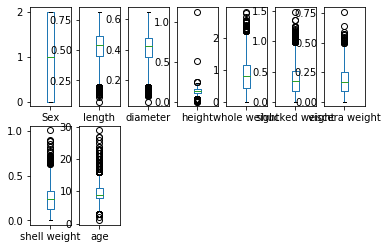

In [111]:
data.plot(kind='box',subplots=True,layout=(2,7));

In [112]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
data_final.shape

(4177, 9)


(4027, 9)

In [113]:
data.skew()

Sex              -0.098155
length           -0.639873
diameter         -0.609198
height            3.128817
whole weight      0.530959
shucked weight    0.719098
viscera weight    0.591852
shell weight      0.620927
age               1.114102
dtype: float64

In [114]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])

In [115]:
data.skew()

Sex              -0.098155
length           -0.639873
diameter         -0.609198
height           -0.295641
whole weight      0.530959
shucked weight   -0.141443
viscera weight   -0.183321
shell weight     -0.222772
age               0.471366
dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df_x=data.drop('age',axis=1)
y=data['age']
df_x.shape,y.shape

((4177, 8), (4177,))

In [117]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)

In [118]:
x.shape,y.shape

((4177, 8), (4177,))

In [119]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=.20)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.5734363527514353

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [121]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=201,test_size=.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.6146185955391787
mean squared error 0.09422160968695337
mean absolute error 0.23693843464875788


In [122]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [123]:
sv=SVR()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.6461566246092223
mean squared error 0.08651090068299692
mean absolute error 0.21832216278719768


In [124]:
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.6068752241767028
mean squared error 0.096114780726685
mean absolute error 0.22874863280840294


In [125]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.1868194570290691
mean squared error 0.19881389926436147
mean absolute error 0.32682525793707645


In [126]:
rf=RandomForestRegressor(n_estimators=14,max_depth=9,random_state=184)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.6405857838776272
mean squared error 0.08787291134299464
mean absolute error 0.22271172161832473


In [129]:
gb=GradientBoostingRegressor(random_state=195,learning_rate=0.1,max_depth=4,n_estimators=101)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.6448694242727202
mean squared error 0.08682560732501692
mean absolute error 0.2231128250142155


In [137]:
xg=XGBRegressor(learning_rate=0.1,max_depth=4,random_state=101,n_estimators=202)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

[14:31:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6429543201697407
mean squared error 0.08729382968658435
mean absolute error 0.22441488701339307


In [139]:
from sklearn.externals import joblib
joblib.dump(gb,'abalone.pk1')

['abalone.pk1']